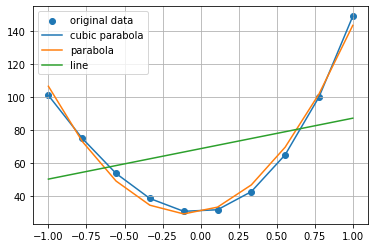

In [310]:
# 1.1.3
import numpy as np
import matplotlib.pyplot as plt

Xs = np.linspace(-1,1,10)
Ys = 20*Xs**3 + 95*Xs**2 + 4*Xs + 30

plt.figure()

A = np.stack([Xs**3,Xs**2,Xs, np.ones(len(Xs))]).T
m = np.linalg.lstsq(A,Ys, rcond = None)[0]

plt.scatter(Xs,Ys, label = "original data")
plt.plot(Xs, m[0]*Xs**3 + m[1]*Xs**2 + m[2]*Xs + m[3], label = "cubic parabola")

A = np.stack([Xs**2,Xs, np.ones(len(Xs))]).T
m = np.linalg.lstsq(A,Ys, rcond = None)[0]

plt.plot(Xs, m[0]*Xs**2 +m[1]*Xs + m[2], label = "parabola")

A = np.stack([Xs, np.ones(len(Xs))]).T
m = np.linalg.lstsq(A,Ys, rcond = None)[0]

plt.plot(Xs, m[0]*Xs + m[1], label = "line")

plt.legend()
plt.grid()
plt.show()


[0.6513834231325883, 2.0633507691096624, 1.5501565286220298]


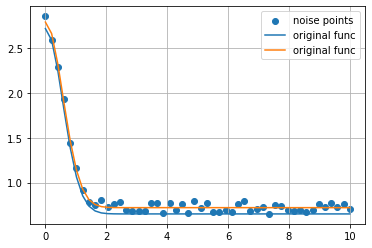

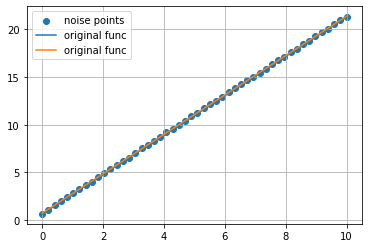

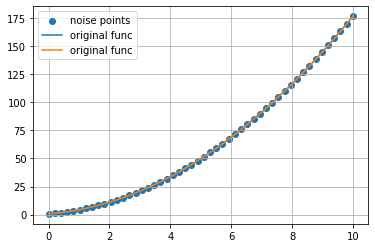

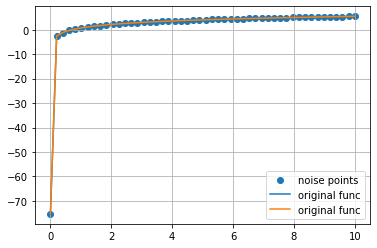

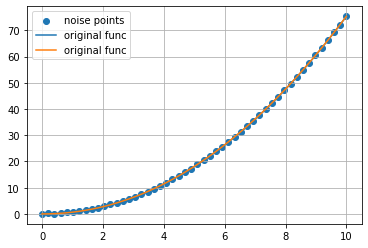

In [191]:
# 1.1.5

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

funcs = [
    lambda x,b0,b1,b2: b0+b1*np.exp(-b2*x**2),
    lambda x,b0,b1 : b0+b1*x,
    lambda x,b0,b1,b2: b0+b1*x+b2*x**2,
    lambda x,b0,b1 : b0 + b1 * np.log(x),
    lambda x,b0,b1: b0*x**b1
]

beta = [np.random.random(1)[0]*np.exp(i) for i in range(3)]

print(beta)

Xs = np.linspace(0.0000000000000001,10,50)

for f in funcs:
    try:
        Ys = [f(x,beta[0],beta[1],beta[2]) for x in Xs]
    except TypeError:
        Ys = [f(x,beta[0],beta[1]) for x in Xs]
    Yss = Ys + 0.15*np.random.random(len(Ys))

    plt.figure()
    plt.scatter(Xs,Yss, label = "noise points")
    plt.plot(Xs,Ys, label = "original func")

    beta_opt, beta_cov = curve_fit(f,Xs,Yss)

    try:
        Yss = [f(x,beta_opt[0],beta_opt[1],beta_opt[2]) for x in Xs]
    except IndexError:
        Yss = [f(x,beta_opt[0],beta_opt[1]) for x in Xs]

    plt.plot(Xs,Yss, label = "original func")
    plt.grid()
    plt.legend()
    plt.show()






[0.94790678]
-0.04569943634546153


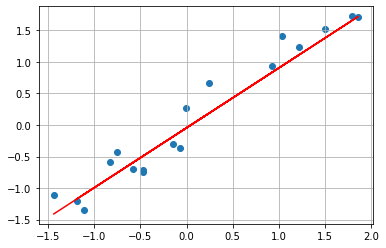

In [240]:
# 1.2.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")

scaler = preprocessing.StandardScaler()

data[["YearsExperience"]] = scaler.fit_transform(data[["YearsExperience"]])
data[["Salary"]] = scaler.fit_transform(data[["Salary"]])

xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,1], test_size = 0.60)

regressor = LinearRegression()

regressor.fit(xtrain,ytrain)

predy = regressor.predict(xtest)

print(regressor.coef_)
print(regressor.intercept_)

plt.grid()
plt.scatter(xtest,ytest)
plt.plot(xtest,predy,color = "red")


0.3873350668971376


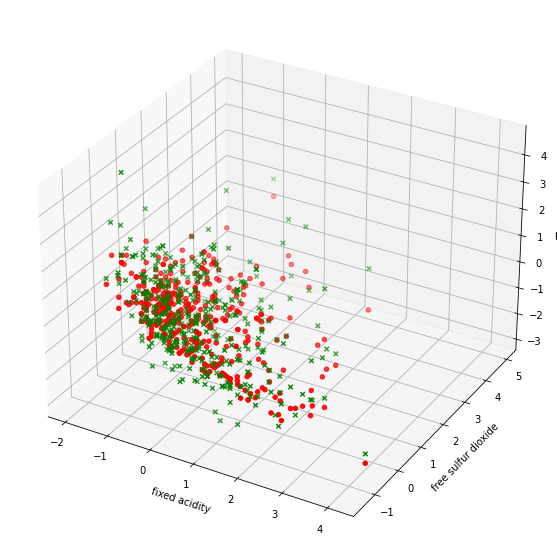

In [288]:
# 1.3.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

scaler = preprocessing.StandardScaler()

for col in data.columns:
    data[[col]] = scaler.fit_transform(data[[col]])
#print(data)

xtrain, xtest, ytrain, ytest = train_test_split(data[["fixed acidity", "free sulfur dioxide"]], data[["pH"]], test_size = 0.25)

regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

predy = regressor.predict(xtest)

print(regressor.score(xtest, ytest))

plot = plt.figure(figsize = (15,10))
ax = plot.add_subplot(111, projection = "3d")

ax.set_xlabel("fixed acidity")

ax.set_ylabel("free sulfur dioxide")

ax.set_zlabel("pH")

ax.scatter3D(xtest["fixed acidity"],xtest["free sulfur dioxide"], ytest, marker = "x", c = "green")
ax.scatter3D(xtest["fixed acidity"],xtest["free sulfur dioxide"], predy, marker = "o", c = "red")





[  2.23214286 -16.91071429  35.75      ]
[-1.28571429  8.66666667]


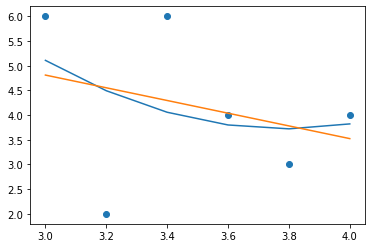

In [309]:
# 1.3.2

import numpy as np
import matplotlib.pyplot as plt

data = np.array([[3.0, 6.0],
                 [3.2, 2.0],
                 [3.4, 6.0],
                 [3.6, 4.0],
                 [3.8, 3.0],
                 [4.0, 4.0]]).reshape(6,2)

A = np.stack([data[:,0]**2,data[:,0],np.ones(len(data[:,0]))]).T

plt.scatter(data[:,0],data[:,1])

m = np.linalg.lstsq(A, data[:,1], rcond=None)[0]
print(m)
plt.plot(data[:,0],m[0]*data[:,0]**2 + m[1]*data[:,0] + m[2])

A = np.stack([data[:,0],np.ones(len(data[:,0]))]).T

m = np.linalg.lstsq(A, data[:,1], rcond=None)[0]
print(m)

plt.plot(data[:,0],m[0]*data[:,0] + m[1])